In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Base_Files.ClassLevyJumpProcesses import TemperedStableSubordinator
import GPy
from Base_Files.Creating_the_NGP import GaussianProcess


In [2]:
# Set Parameters
t1 = 0.0
t2 = 10.0

num_obs = 500 # (N) number of points e.g. size of data set
num_epochs = 2000
subordinator_truncation = 0.0
kappa = 0.2
delta = 1.2
gamma = 0.3
nProcesses = 1
l = 1

initial_sub = TemperedStableSubordinator(t1, t2, num_obs, num_epochs, subordinator_truncation, kappa=kappa, delta=delta, gamma=gamma).generate_path().reshape(-1,1)
X = initial_sub
Y = GaussianProcess(initial_sub, 1, num_obs).reshape(-1,1)

In [3]:
Y1 = Y[:250]
Y2 = Y[250:]

In [4]:
def log_likelihood(X, Y):
    kernel = GPy.kern.RBF(input_dim=1)
    sub_kernel = GPy.kern.Brownian(input_dim=1)
    model = GPy.models.GPRegression(X, Y, kernel*sub_kernel)
    log_likelihood = model.log_likelihood()
    return log_likelihood

num_iter = 500
burn_in = 0

Number of accepted likelihood samples: 8
Accepted Likelihood samples: [-559.7785571038282, -545.7116648977823, -534.2743128375299, -533.8499244239616, -533.5935919304819, -530.6173846257263, -527.9771866102811, -527.2336700565494]
Accepted Alphas: [30028.216507275032, 1285800.714077252, 92721.16663251334, 1.5286552289207804, 1.292182298709916, 19.613288177420653, 14.015978713232592, 2.1033189588800942]
-522.23978993888


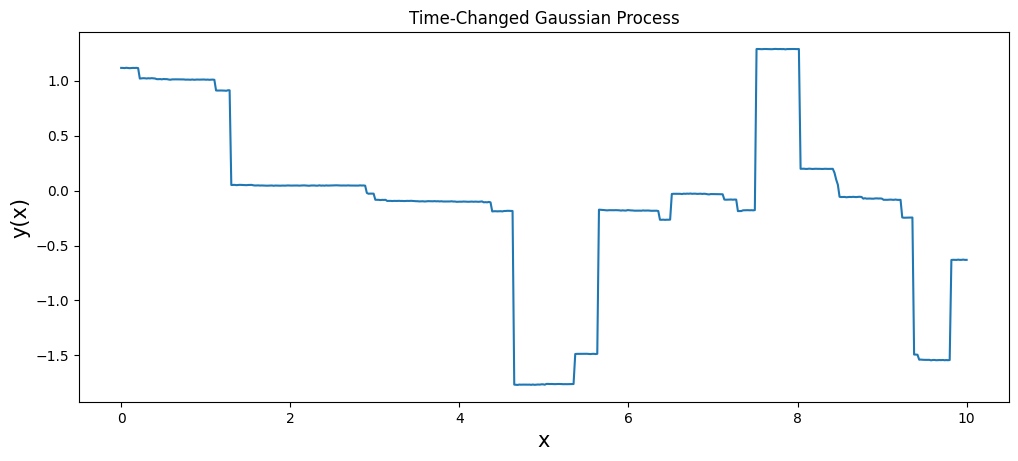

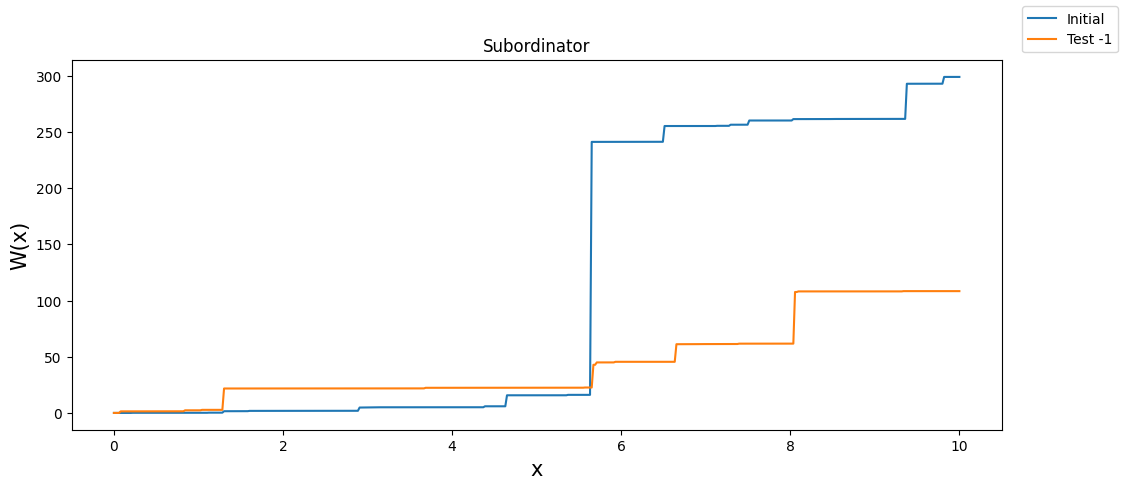

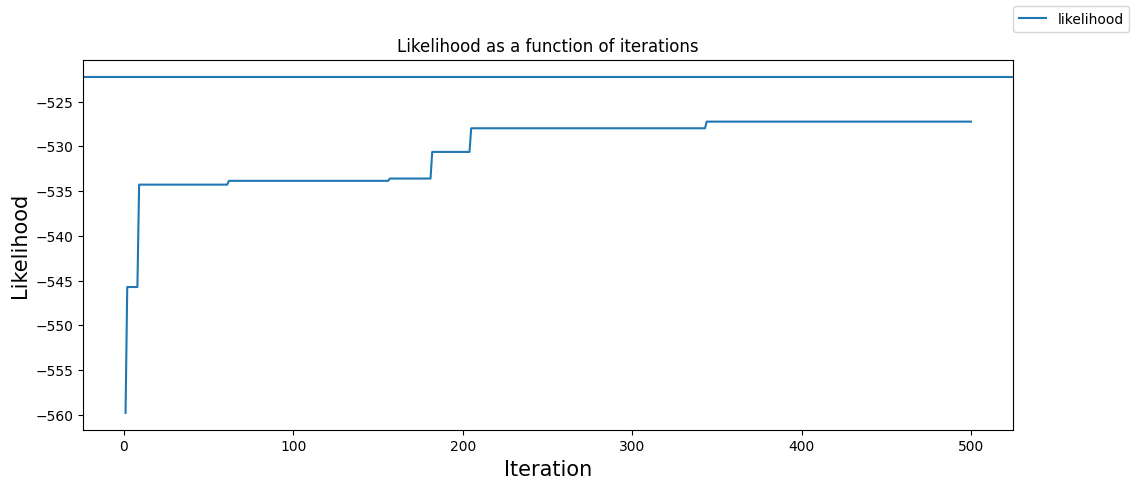

In [11]:
# Run the Metropolis-Hastings algorithm
t1 = 0.0
t2 = 10.0

N = 1

current_sub = TemperedStableSubordinator(t1, t2, int(num_obs/N), num_epochs, subordinator_truncation, kappa=kappa, delta=delta, gamma=gamma).generate_path().reshape(-1,1)
acceptances = 0

accept_sub_samples = []

likelihood_samples = []
accept_likelihood_samples = []

alphas = []
accept_alphas = []


for i in range(num_iter):
    # Draw a new proposal from the proposal distribution
#     print('Iteration:', i+1)

    new_sub = TemperedStableSubordinator(t1, t2, int(num_obs/N), num_epochs, subordinator_truncation, kappa=kappa, delta=delta, gamma=gamma).generate_path().reshape(-1,1)
    log_alpha = log_likelihood(new_sub, Y) - log_likelihood(current_sub, Y)
    alpha = np.exp(log_alpha)

    accept = np.random.uniform() < alpha
    alphas.append(alpha)

    if accept:
        current_sub = new_sub

        acceptances += 1

        accept_likelihood_samples.append(log_likelihood(current_sub, Y))

        accept_alphas.append(alpha)

        accept_sub_samples.append(current_sub)

    likelihood_samples.append(log_likelihood(current_sub, Y))


# Print the acceptance rate
#print('Acceptance rate:', acceptances*100 / num_iter, '%')
print('Number of accepted likelihood samples:', acceptances)
print('Accepted Likelihood samples:', accept_likelihood_samples)
print('Accepted Alphas:', accept_alphas)
print(log_likelihood(X, Y))

Xs = np.linspace(t1, t2, int(num_obs/N))

plt.figure(1).set_figwidth(12)
plt.xlabel('x', fontsize=15)
plt.ylabel('y(x)', fontsize=15)
plt.title('Time-Changed Gaussian Process')
plt.plot(Xs, Y)

plt.figure(2).set_figwidth(12)
plt.plot(Xs, initial_sub, label='Initial')
plt.plot(Xs, accept_sub_samples[-1], label='Test -1')
plt.title('Subordinator')
plt.xlabel('x', fontsize=15)
plt.ylabel('W(x)', fontsize=15)
plt.figure(2).legend()

plt.figure(3).set_figwidth(12)
plt.plot(np.linspace(1, len(likelihood_samples), len(likelihood_samples)), likelihood_samples, label='likelihood')
plt.axhline(log_likelihood(X, Y))
plt.title('Likelihood as a function of iterations')
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Likelihood', fontsize=15)
plt.figure(3).legend()

t1 = 0.0
t2 = 5.0

current_sub = TemperedStableSubordinator(t1, t2, int(num_obs/2), num_epochs, subordinator_truncation, kappa=kappa, delta=delta, gamma=gamma).generate_path().reshape(-1,1)
print(len(current_sub))
print(current_sub[-1])
print(accept_sub_samples[-1][-1])
print(abs(accept_sub_samples[-1][250]-current_sub[-1]))

diff = current_sub[-1] - accept_sub_samples[-1][250]
addon = accept_sub_samples[-1][250:] + diff

total = np.concatenate((current_sub, addon))

plt.plot(np.linspace(0, 5, int(num_obs/2)), current_sub)
plt.plot(np.linspace(5, 10, int(num_obs/2)), accept_sub_samples[-1][250:])
plt.plot(np.linspace(5, 10, int(num_obs/2)), addon)
plt.plot(np.linspace(0, 10, int(num_obs)), total)
plt.show()

Number of accepted likelihood samples: 10
Accepted Likelihood samples: [-550.2469465904746, -545.9825346210579, -534.1390155616289, -533.0482899401903, -534.3920653255345, -527.3556010682432, -529.3590173041998, -528.5473593233912, -531.7434989296564, -527.5796558471004]
Accepted Alphas: [336.2627897573947, 71.12308512528702, 139179.40445425356, 2.976433052800645, 0.26085896404764297, 1137.3590798350249, 0.1348737348038814, 2.251638066323656, 0.04091986625866161, 64.31822850271435]


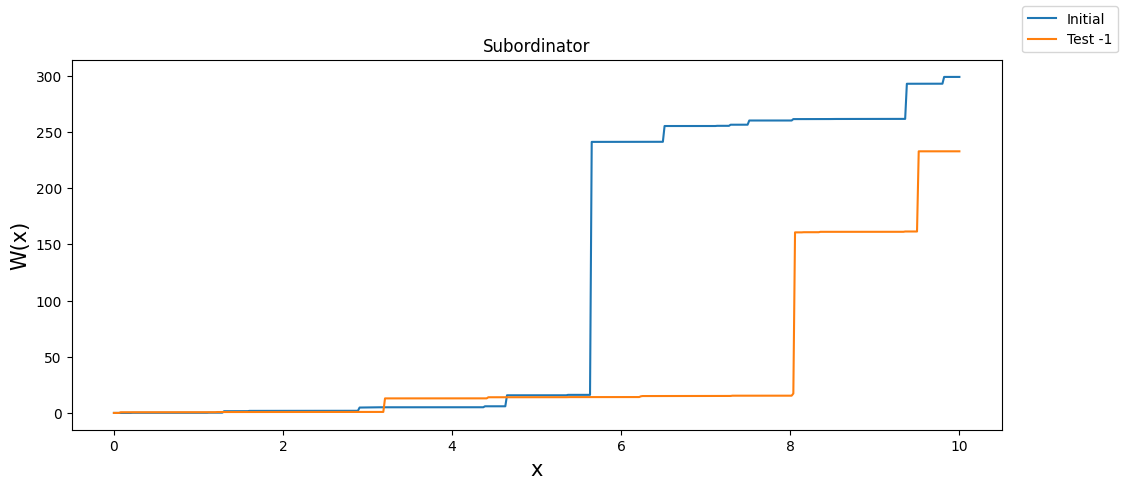

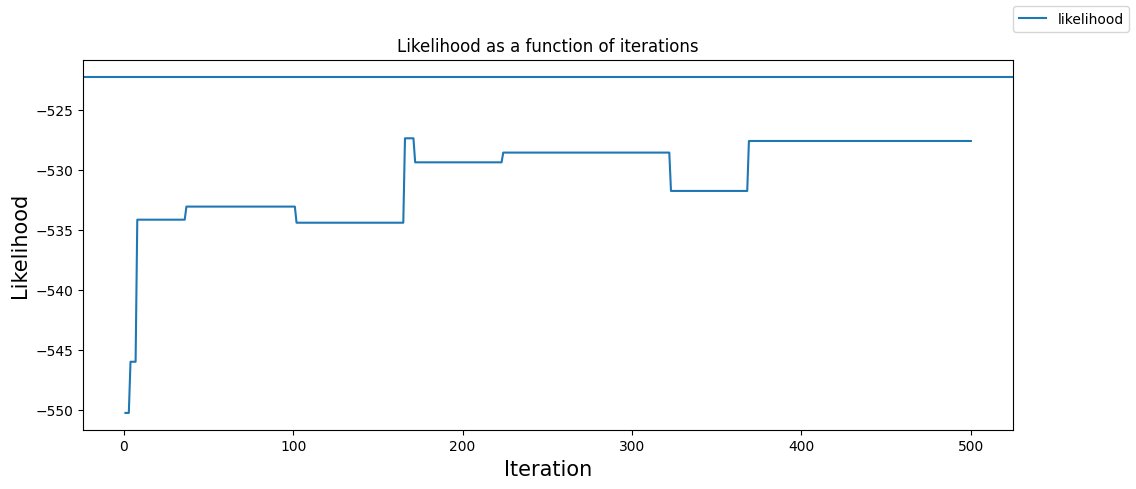

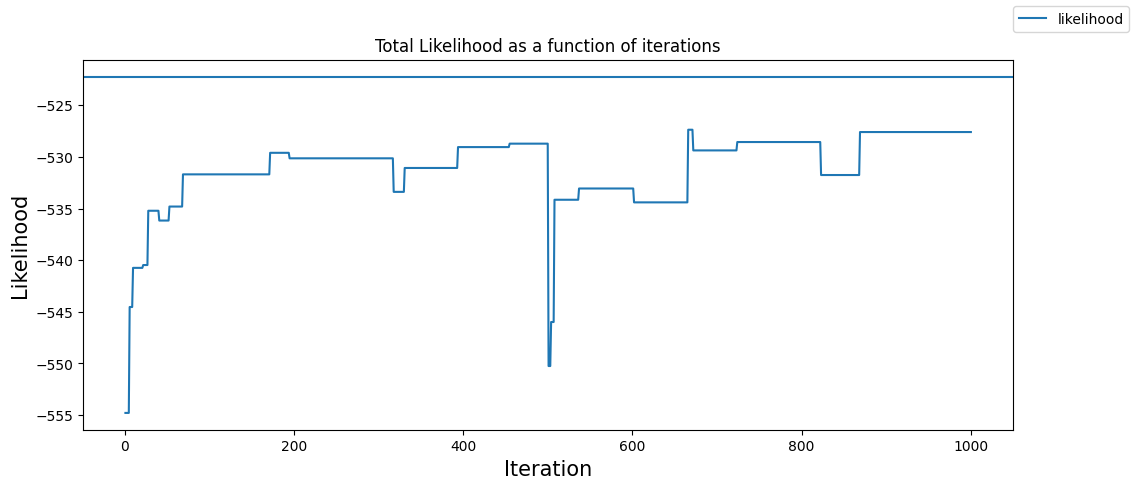

In [9]:
# Run the Metropolis-Hastings algorithm
t1 = 0.0
t2 = 5.0

N = 2

current_sub = TemperedStableSubordinator(t1, t2, int(num_obs/N), num_epochs, subordinator_truncation, kappa=kappa, delta=delta, gamma=gamma).generate_path().reshape(-1,1)
diff1 = current_sub[-1] - accept_sub_samples[-1][250]
addon1 = accept_sub_samples[-1][250:] + diff1
total1 = np.concatenate((current_sub, addon1))
acceptances1 = 0

accept_sub_samples_1 = []

likelihood_samples1 = []
accept_likelihood_samples1 = []

alphas1 = []
accept_alphas1 = []


for i in range(num_iter):
    # Draw a new proposal from the proposal distribution
#     print('Iteration:', i+1)


    new_sub = TemperedStableSubordinator(t1, t2, int(num_obs/N), num_epochs, subordinator_truncation, kappa=kappa, delta=delta, gamma=gamma).generate_path().reshape(-1,1)
    diff2 = new_sub[-1] - accept_sub_samples[-1][250]
    addon2 = accept_sub_samples[-1][250:] + diff2
    total2 = np.concatenate((new_sub, addon2))


    log_alpha = log_likelihood(total2, Y) - log_likelihood(total1, Y)
    alpha = np.exp(log_alpha)

    accept = np.random.uniform() < alpha
    alphas1.append(alpha)

    if accept:
        total1 = total2

        acceptances1 += 1

        accept_likelihood_samples1.append(log_likelihood(total1, Y))

        accept_alphas1.append(alpha)

        accept_sub_samples_1.append(total1)

    likelihood_samples1.append(log_likelihood(total1, Y))

    
# Print the acceptance rate
#print('Acceptance rate:', acceptances*100 / num_iter, '%')
print('Number of accepted likelihood samples:', acceptances1)
print('Accepted Likelihood samples:', accept_likelihood_samples1)
print('Accepted Alphas:', accept_alphas1)
#print(log_likelihood(X[:250], Y1))

Xs = np.linspace(0, 10, int(num_obs))

#plt.figure(1).set_figwidth(12)
#plt.xlabel('x', fontsize=15)
#plt.ylabel('y(x)', fontsize=15)
#plt.title('Time-Changed Gaussian Process')
#plt.plot(Xs, Y1)


plt.figure(2).set_figwidth(12)
plt.plot(Xs, initial_sub, label='Initial')
plt.plot(Xs, accept_sub_samples_1[-1], label='Test -1')
plt.title('Subordinator')
plt.xlabel('x', fontsize=15)
plt.ylabel('W(x)', fontsize=15)
plt.figure(2).legend()

plt.figure(3).set_figwidth(12)
plt.plot(np.linspace(1, len(likelihood_samples1), len(likelihood_samples1)), likelihood_samples1, label='likelihood')
plt.axhline(log_likelihood(X, Y))
plt.title('Likelihood as a function of iterations')
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Likelihood', fontsize=15)
plt.figure(3).legend()

total_likelihood = likelihood_samples + likelihood_samples1

plt.figure(4).set_figwidth(12)
plt.plot(np.linspace(1, len(total_likelihood), len(total_likelihood)), total_likelihood, label='likelihood')
plt.axhline(log_likelihood(X, Y))
plt.title('Total Likelihood as a function of iterations')
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Likelihood', fontsize=15)
plt.figure(4).legend()


t1 = 5.0
t2 = 10.0

current_sub = TemperedStableSubordinator(t1, t2, int(num_obs/2), num_epochs, subordinator_truncation, kappa=kappa, delta=delta, gamma=gamma).generate_path().reshape(-1,1)
print(len(current_sub))
print(accept_sub_samples_1[-1][250])
#print(accept_sub_samples[-1][-1])
#print(abs(accept_sub_samples[-1][250]-current_sub[-1]))

diff = accept_sub_samples_1[-1][250]
addon = current_sub + diff
total = np.concatenate((accept_sub_samples_1[-1][:250], addon))

plt.plot(np.linspace(5, 10, int(num_obs/2)), current_sub)
plt.plot(np.linspace(0, 10, int(num_obs)), accept_sub_samples_1[-1])
#plt.plot(np.linspace(5, 10, int(num_obs/2)), accept_sub_samples[-1][250:])
plt.plot(np.linspace(5, 10, int(num_obs/2)), addon)
plt.plot(np.linspace(0, 10, int(num_obs)), total)
plt.show()

Number of accepted likelihood samples: 8
Accepted Likelihood samples: [-521.906617595003, -522.4145986500856, -519.983599918633, -515.4051072436695, -516.9447021431544, -514.3352960172733, -518.6520011076908, -515.8494297080097]
Accepted Alphas: [2281.317274872435, 0.6017091709846677, 11.37023221972882, 97.36751904136383, 0.2144679649146314, 13.590977125113524, 0.013343777730152771, 16.486986943984498]
-522.23978993888


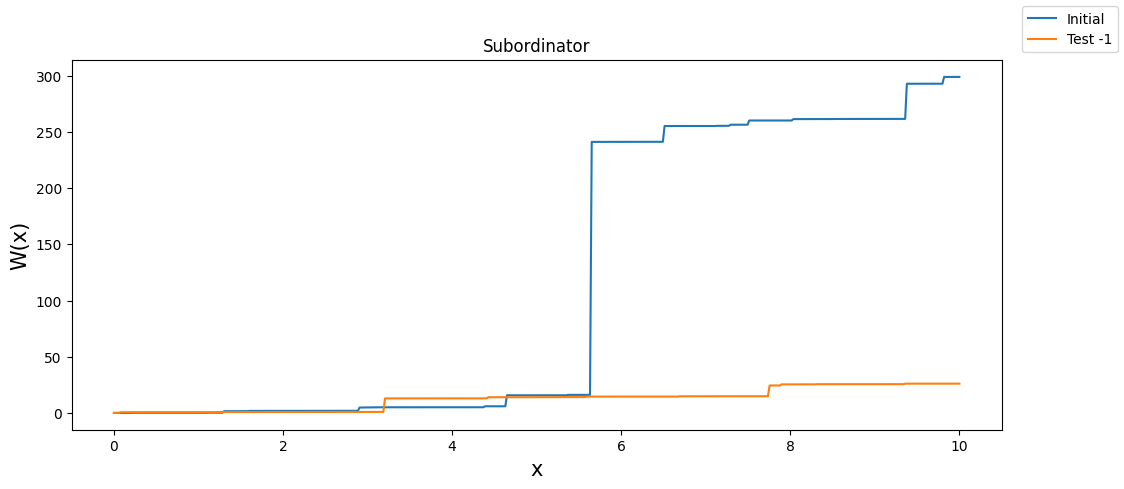

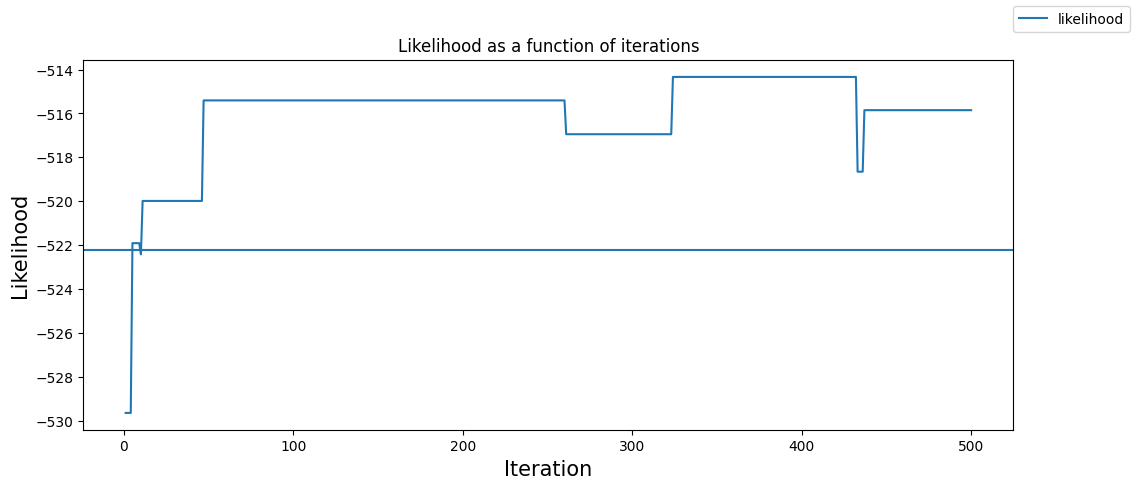

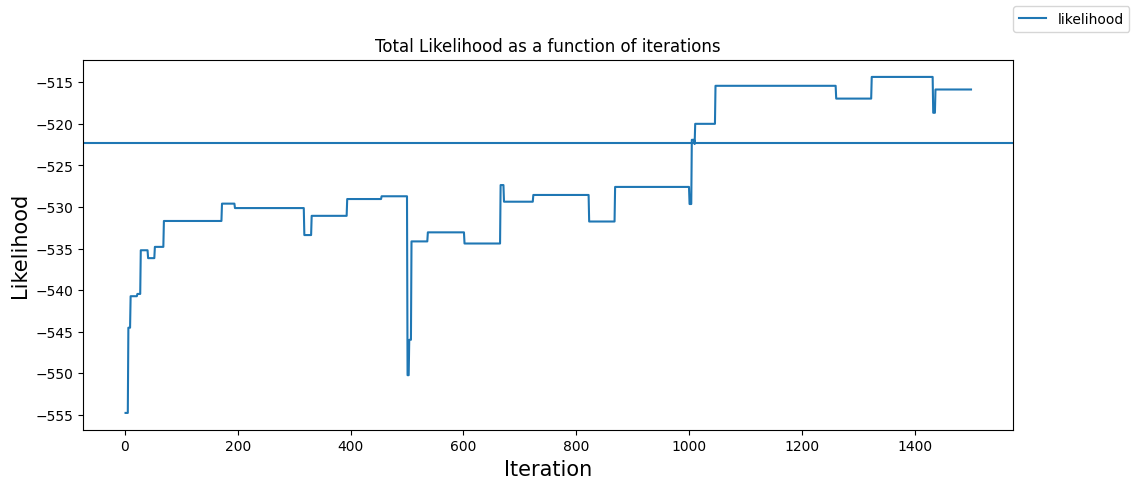

In [10]:
# Run the Metropolis-Hastings algorithm
t1 = 5.0
t2 = 10.0

N = 2

current_sub = TemperedStableSubordinator(t1, t2, int(num_obs/N), num_epochs, subordinator_truncation, kappa=kappa, delta=delta, gamma=gamma).generate_path().reshape(-1,1)
diff3 = accept_sub_samples_1[-1][250]
addon3 = current_sub + diff3
total3 = np.concatenate((accept_sub_samples_1[-1][:250], addon3))

acceptances2 = 0

accept_sub_samples_2 = []

likelihood_samples2 = []
accept_likelihood_samples2 = []

alphas2 = []
accept_alphas2 = []


for i in range(num_iter):
    # Draw a new proposal from the proposal distribution
#     print('Iteration:', i+1)

    new_sub = TemperedStableSubordinator(t1, t2, int(num_obs/N), num_epochs, subordinator_truncation, kappa=kappa, delta=delta, gamma=gamma).generate_path().reshape(-1,1)
    diff4 = accept_sub_samples_1[-1][250]
    addon4 = new_sub + diff4
    total4 = np.concatenate((accept_sub_samples_1[-1][:250], addon4))

    log_alpha = log_likelihood(total4, Y) - log_likelihood(total3, Y)
    alpha = np.exp(log_alpha)

    accept = np.random.uniform() < alpha
    alphas2.append(alpha)

    if accept:
        total3 = total4

        acceptances2 += 1

        accept_likelihood_samples2.append(log_likelihood(total3, Y))

        accept_alphas2.append(alpha)

        accept_sub_samples_2.append(total3)

    likelihood_samples2.append(log_likelihood(total3, Y))

    
# Print the acceptance rate
#print('Acceptance rate:', acceptances*100 / num_iter, '%')
print('Number of accepted likelihood samples:', acceptances2)
print('Accepted Likelihood samples:', accept_likelihood_samples2)
print('Accepted Alphas:', accept_alphas2)
print(log_likelihood(X, Y))

Xs = np.linspace(0, 10, int(num_obs))

#plt.figure(1).set_figwidth(12)
#plt.xlabel('x', fontsize=15)
#plt.ylabel('y(x)', fontsize=15)
#plt.title('Time-Changed Gaussian Process')
#plt.plot(Xs, Y1)


plt.figure(2).set_figwidth(12)
plt.plot(Xs, initial_sub, label='Initial')
plt.plot(Xs, accept_sub_samples_2[-1], label='Test -1')
plt.title('Subordinator')
plt.xlabel('x', fontsize=15)
plt.ylabel('W(x)', fontsize=15)
plt.figure(2).legend()

plt.figure(3).set_figwidth(12)
plt.plot(np.linspace(1, len(likelihood_samples2), len(likelihood_samples2)), likelihood_samples2, label='likelihood')
plt.axhline(log_likelihood(X, Y))
plt.title('Likelihood as a function of iterations')
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Likelihood', fontsize=15)
plt.figure(3).legend()

total_likelihood = likelihood_samples + likelihood_samples1 + likelihood_samples2

plt.figure(4).set_figwidth(12)
plt.plot(np.linspace(1, len(total_likelihood), len(total_likelihood)), total_likelihood, label='likelihood')
plt.axhline(log_likelihood(X, Y))
plt.title('Total Likelihood as a function of iterations')
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Likelihood', fontsize=15)
plt.figure(4).legend()

In [76]:
temp1 = (accept_sub_samples_1[-1][-1] - accept_sub_samples_2[-1][0])[0]
temp2 = (accept_sub_samples_1[-2][-1] - accept_sub_samples_2[-2][0])[0]
temp3 = (accept_sub_samples_1[-3][-1] - accept_sub_samples_2[-3][0])[0]

accept_sub_samples_2[-1] = accept_sub_samples_2[-1] + temp1
accept_sub_samples_2[-2] = accept_sub_samples_2[-2] + temp2
accept_sub_samples_2[-3] = accept_sub_samples_2[-3] + temp3



In [77]:
test_1 = np.concatenate((accept_sub_samples_1[-1], accept_sub_samples_2[-1]))
test_2 = np.concatenate((accept_sub_samples_1[-2], accept_sub_samples_2[-2]))
test_3 = np.concatenate((accept_sub_samples_1[-3], accept_sub_samples_2[-3]))

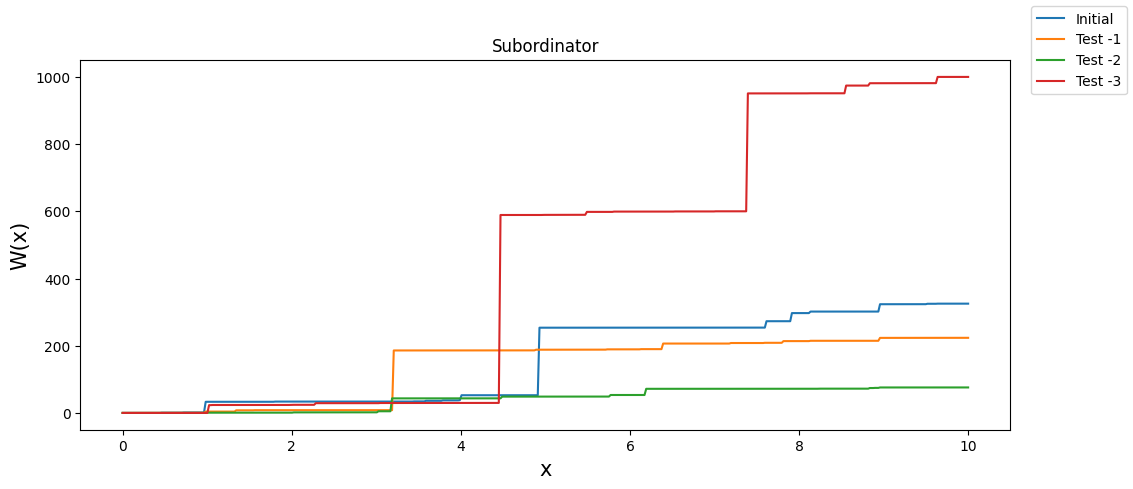

In [78]:
t1 = 0.0
t2 = 10.0
Xs = np.linspace(t1, t2, int(num_obs/1))

plt.figure(2).set_figwidth(12)
plt.plot(Xs, initial_sub, label='Initial')
plt.plot(Xs, test_1, label='Test -1')
plt.plot(Xs, test_2, label='Test -2')
plt.plot(Xs, test_3, label='Test -3')
plt.title('Subordinator')
plt.xlabel('x', fontsize=15)
plt.ylabel('W(x)', fontsize=15)
plt.figure(2).legend()